## Import packages

In [44]:
import tensorflow as tf

In [45]:
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt

## Load Dataset

In [23]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Nadira Ahmadi\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Nadira Ahmadi\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

## Encoding the Integer input to the binary matrix

In [26]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Define our model

In [31]:
my_model = models.Sequential()
my_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
my_model.add(layers.Dense(16, activation='relu'))
my_model.add(layers.Dense(1, activation='sigmoid'))

## Compile the model

In [32]:
my_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## Configure the optimizer

In [33]:
my_model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

## Using custom loss and metrics

In [34]:
my_model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

## Create the validation set

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Train the model

In [36]:
my_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = my_model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6932 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6931 - acc: 0.5040 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6931 - acc: 0.5043 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6931 - acc: 0.5060 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6931 - acc: 0.5022 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.6931 - acc: 0.5053 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6931 - a

In [41]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

## Plot the training and validation loss

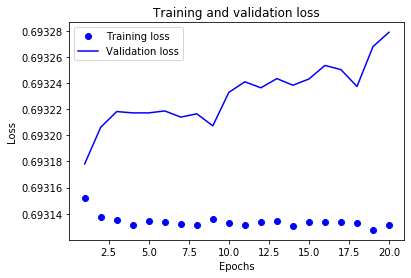

In [43]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

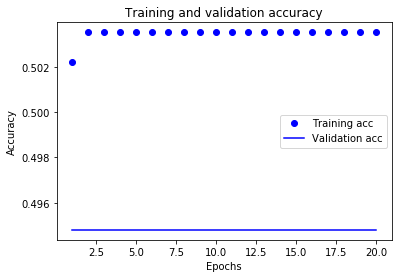

In [50]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()